# Laurentia paleogeography plotting

This Jupyter notebook plots paleogeographic reconstructions of Laurentia that are developed within the Laurentia_reconstructions_generate notebook. It is associated with the manuscript:

**The Precambrian paleogeography of Laurentia** written by Nicholas L. Swanson-Hysell for a book entitled *Ancient Supercontinents and the Paleogeography of the Earth*

In [33]:
import cartopy.crs as ccrs
import cartopy
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader
from cartopy.feature import NaturalEarthFeature, COLORS
import matplotlib.pyplot as plt
import pandas as pd
import pmagpy.ipmag as ipmag
import pmagpy.pmag as pmag

In [12]:
Laurentia_poles = pd.read_csv('../Data/Leirubakki_poles_w_PlateID.csv')
Laurentia_poles = Laurentia_poles[Laurentia_poles['Plate_ID'] == 1000]
Laurentia_poles.columns

Index(['Unnamed: 0', 'Terrane', 'ROCKNAME', '-10.3', 'COMPONENT', 'TESTS',
       'TILT', 'SLAT', 'SLONG', 'B', 'N', 'DEC', 'INC', 'abs(I)', 'KD', 'ED95',
       'PLAT', 'PLONG', 'DP', 'DM', 'A95', '%REV', 'DEMAGCODE', '40', '24',
       '10', '16', '2', '3', '4', '5', '6', '7', 'Q(7)', 'Grade',
       'nominal age', 'lomagage', 'himagage', 'REF/method', 'ROCKNAME.1',
       ' POLE AUTHORS', 'YEAR', 'JOURNAL', 'VOLUME', 'VPAGES', 'TITLE',
       'Overlap_Comment', 'Pole_citation_code', 'Geochron_citation_code',
       'Notes_Changes_from_Leirubakki', 'Plate_ID'],
      dtype='object')

In [20]:
Laurentia_poles[(Laurentia_poles['nominal age'] > (700 - 20))]

,Unnamed: 0,Terrane,ROCKNAME,-10.3,COMPONENT,TESTS,TILT,SLAT,SLONG,B,...,YEAR,JOURNAL,VOLUME,VPAGES,TITLE,Overlap_Comment,Pole_citation_code,Geochron_citation_code,Notes_Changes_from_Leirubakki,Plate_ID
18,18,Laurentia-Trans-Hudson orogen,Boot-Phantom Pluton,8359,NaN,"Rc,C+",0.0,54.700001,258.099998,18.0,...,1999,Basement Tectonics,13,313-331,Paleomagnetism of the Boot-Phantom pluton and ...,NaN,\cite{Symons1999a},NaN,NaN,1000
19,19,Laurentia-Trans-Hudson orogen,Deschambault Pegmatites,8889,NaN,NaN,0.0,54.900002,256.699997,18.0,...,2000,Phys.Chem.Earth(A),25,479-487,Paleomagnetism of the Deschambault Pegmatites:...,NaN,\cite{Symons2000a},not directly dated; dated elsewhere in domain ...,NaN,1000
20,20,Laurentia-Trans-Hudson orogen,Jan Lake Granite,new,A component,NaN,0.0,54.900002,257.199997,10.0,...,1995,"Saskatchewan Geol.Surv.Misc.Rpt., 95-4",NaN,145-152,"Paleomagnetism of the Jan Lake Granite, Trans-...",NaN,\cite{Gala1995a},\cite{Bickford2005a},Gala et al. 1995 make a division between VGPs ...,1000
36,36,Laurentia,Dubawnt Group,2737,NaN,"C+,Rc",100.0,64.099998,265.599998,30.0,...,1973,Geol.Soc.Amer.Bull.,84,859-870,Paleomagnetism of the Dubawnt Group,Overlaps with a Devonian pole,\cite{Park1973},NaN,NaN,1000
37,37,Laurentia,Cleaver Dykes,9139,NaN,"C+, C*+",0.0,67.500000,241.970001,17.0,...,2004,Precambrian Res.,129,251-270,Early Proterozoic geomagnetic field in western...,NaN,\cite{Irving2004},NaN,NaN,1000
38,38,Laurentia,Western Channel Diabase,2669,NaN,"Co,C+ in Irving+04",0.0,66.400002,242.199997,35.0,...,1972,Canad.J.Earth Sci.,9,960-971,Paleomagnetism of the Western Channel Diabase ...,NaN,\cite{Irving1972},NaN,NaN,1000
39,39,Laurentia,St.Francois Mountains Acidic Rocks,8932,NaN,"C*+,F+,G+",100.0,37.500000,269.500000,18.0,...,2002,Tectonics,21(2),"1007, doi:10.1029/2000TC001265",Revisiting the paleomagnetism of the 1.476 Ga ...,NaN,\cite{Meert2002b},"""The St. Francois Mountains (SFM) region of Mi...",NaN,1000
40,40,Laurentia,Michikamau Intrusion Combined,2274,Combined Result,"C+,Ro",0.0,54.500000,296.000000,12.0,...,1976,Canad.J.Earth Sci.,13,1052-1057,Further paleomagnetic results from the Michika...,NaN,\cite{Emslie1976a},NaN,NaN,1000
41,41,Laurentia,Spokane Formation,9039,Primary,F+,100.0,48.200001,246.800003,8.0,...,2002,Geol.Soc.Amer.Bull.,114,619-638,Tightening the Belt: Paleomagnetic-stratigraph...,NaN,\cite{Elston2002},NaN,NaN,1000
42,42,Laurentia,Snowslip Formation,9038,Primary,"F+,Ro",100.0,47.900002,245.900002,9.0,...,2002,Geol.Soc.Amer.Bull.,114,619-638,Tightening the Belt: Paleomagnetic-stratigraph...,NaN,\cite{Elston2002},NaN,NaN,1000


In [2]:
def make_mollweide_map(central_longitude=0, figsize=(8, 8),
                       grid_lines=True,
                       lat_grid=[-180., -150., -120.,  -90.,  -60.,  -30.,
                                 0.,   30.,   60., 90.,  120.,  150.,  180.],
                       lon_grid=[-180., -150., -120.,  -90.,  -60.,  -30.,    0.,   30.,   60., 90.,  120.,  150.,  180.]):
    '''
    Function creates and returns a Mollweide map projection using cartopy

    Example
    -------
    >>> map_axis = make_mollweide_map(central_longitude=200)

    Optional Parameters
    -----------
    central_longitude : central longitude of projection (default is 0)
    central_latitude : central latitude of projection (default is 0)
    figsize : size of the figure (default is 8x8)
    add_land : chose whether land is plotted on map (default is True)
    land_color : specify land color (default is 'tan')
    add_ocean : chose whether land is plotted on map (default is False, change to True to plot)
    ocean_color : specify ocean color (default is 'lightblue')
    grid_lines : chose whether gird lines are plotted on map (default is true)
    lat_grid : specify the latitude grid (default is 30 degree spacing)
    lon_grid : specify the longitude grid (default is 30 degree spacing)
    '''
    fig = plt.figure(figsize=figsize)
    map_projection = ccrs.Mollweide(central_longitude=central_longitude)
    ax = plt.axes(projection=map_projection)
    ax.set_global()
    if grid_lines == True:
        ax.gridlines(xlocs=lon_grid, ylocs=lat_grid)
    return ax

def make_orthographic_map(central_longitude=0, central_latitude=0, figsize=(8, 8),
                          grid_lines=True,
                          lat_grid=[-80.,  -60.,  -30.,
                                    0.,   30.,   60., 80.],
                          lon_grid=[-180., -150., -120.,  -90.,  -60.,  -30.,    0.,   30.,   60., 90.,  120.,  150.,  180.]):
    '''
    Function creates and returns an orthographic map projection using cartopy

    Example
    -------
    >>> map_axis = make_orthographic_map(central_longitude=200,central_latitude=30)

    Optional Parameters
    -----------
    central_longitude : central longitude of projection (default is 0)
    central_latitude : central latitude of projection (default is 0)
    figsize : size of the figure (default is 8x8)
    add_land : chose whether land is plotted on map (default is true)
    land_color : specify land color (default is 'tan')
    add_ocean : chose whether land is plotted on map (default is False, change to True to plot)
    ocean_color : specify ocean color (default is 'lightblue')
    grid_lines : chose whether gird lines are plotted on map (default is true)
    lat_grid : specify the latitude grid (default is 30 degree spacing)
    lon_grid : specify the longitude grid (default is 30 degree spacing)
    '''
    fig = plt.figure(figsize=figsize)
    map_projection = ccrs.Orthographic(
        central_longitude=central_longitude, central_latitude=central_latitude)
    ax = plt.axes(projection=map_projection)
    ax.set_global()
    if grid_lines == True:
        ax.gridlines(xlocs=lon_grid, ylocs=lat_grid, linewidth=1,
                     color='black', linestyle='dotted')
    return ax

,Unnamed: 0,time,pole_lat,pole_lon,pole_angle
0,0,1750.0,4.344879,-170.047240,-287.499778
1,1,1600.0,26.685441,-175.071176,-264.710615
2,2,1450.0,24.464100,170.852200,-224.407600
3,3,1300.0,46.894735,177.802099,-220.631781
4,4,1150.0,66.322502,-164.333590,-209.538880
5,5,1000.0,29.646366,148.162908,-172.635443
6,6,850.0,42.099558,154.933186,-153.488315
7,7,700.0,44.704897,179.774401,-158.264811
8,8,650.0,38.784420,-176.048438,-163.122469
9,9,500.0,46.550000,175.930000,-162.720000


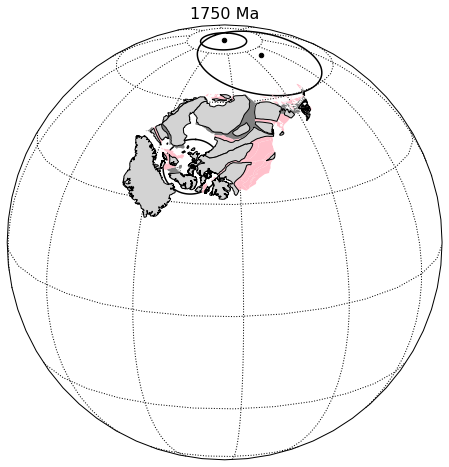

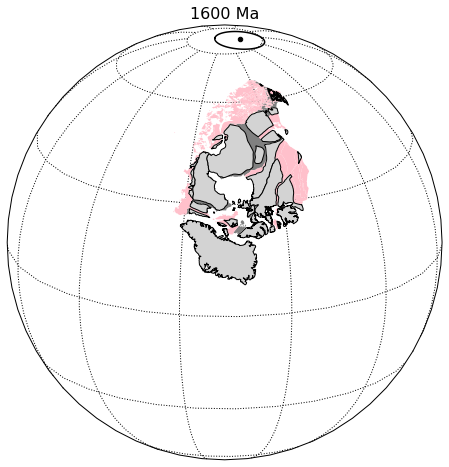

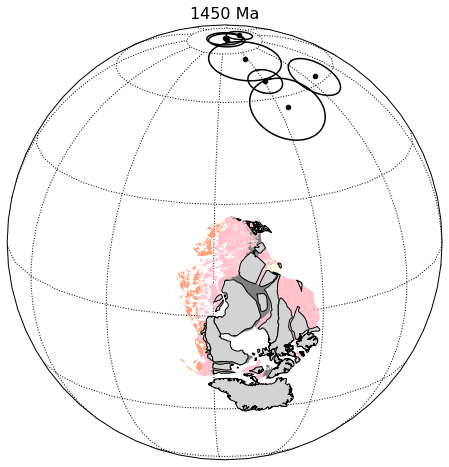

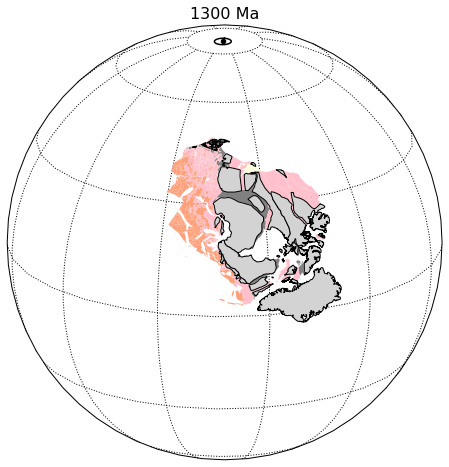

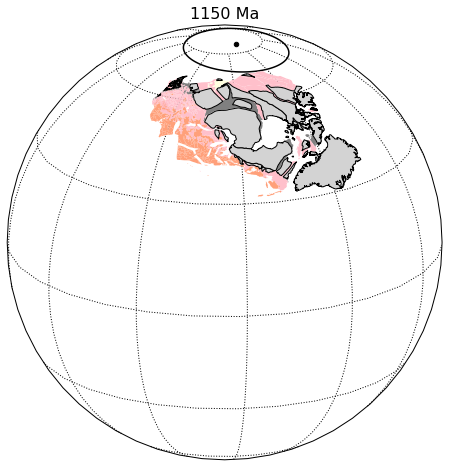

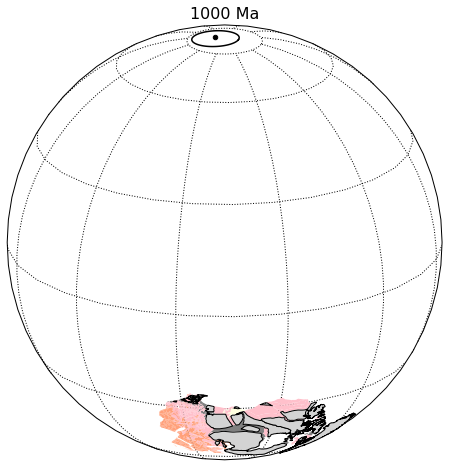

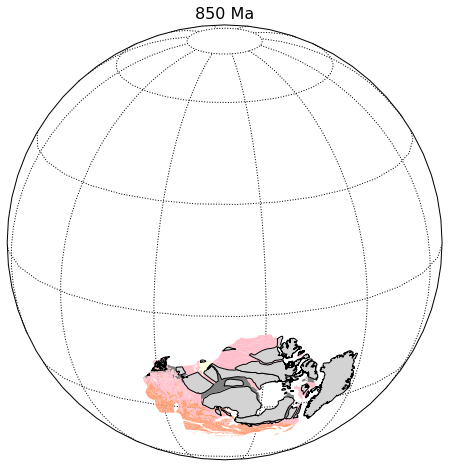

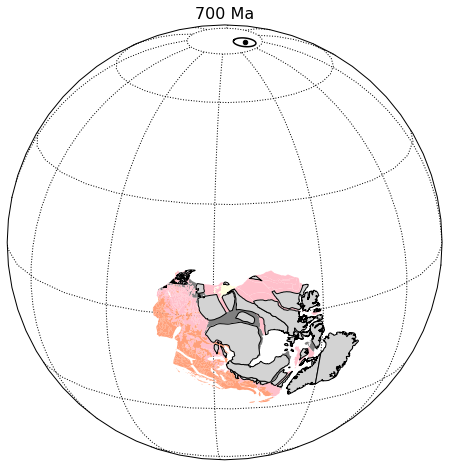

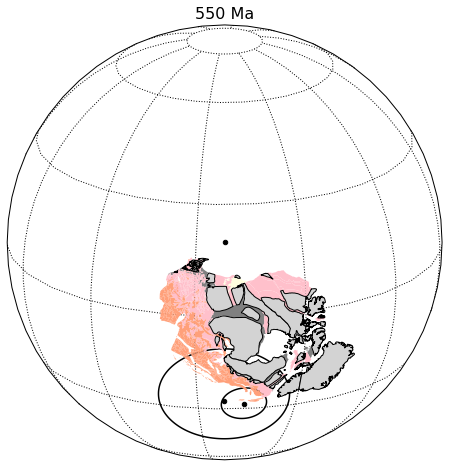

In [48]:
recon_times = [1750,1600,1450,1300,1150,1000,850,700,550]
central_longitudes = [115,102,93,108,114,103,139,153,158]
# recon_times = [700]
# central_longitudes = [153]
# euler_list = [[44.704897,179.774401,-158.264811]]

euler_rotations = pd.read_csv('../Reconstructions/euler_rotations.csv')

for n in range(0,len(recon_times)):

    ax = make_orthographic_map(central_longitude=central_longitudes[n],central_latitude=20)

    shpfilename = '../Reconstructions/Proterozoic_Laurentia_simple/{0}Ma_Laurentia.shp'.format(recon_times[n])

    reader = shpreader.Reader(shpfilename)
    units = reader.records()

    for unit in units:

        if unit.attributes['Unit'] == 'Basin' or \
           unit.attributes['Unit'] == '2.5 - 2.0 Ga miogeoclinal sediments':
                ax.add_geometries(unit.geometry, ccrs.PlateCarree(),
                      facecolor='lightyellow',
                      label=unit.attributes['Unit'],zorder=76)

        elif unit.attributes['Unit'] == '1.9 - 1.8 Ga reworked Archean crust':
            ax.add_geometries(unit.geometry, ccrs.PlateCarree(),
                      facecolor='grey',
                      label=unit.attributes['Unit'],zorder=77)
        elif unit.attributes['Unit'] == '2.0 - 1.8 Ga juvenile orogens' or \
             unit.attributes['Unit'] == '2.0 - 1.8 Ga juvenile arcs' or \
             unit.attributes['Unit'] == '1.80 - 1.76 Ga juvenile arcs' or \
             unit.attributes['Unit'] == '1.76 - 1.72 Ga juvenile crust' or \
             unit.attributes['Unit'] == '1.72 - 1.68 Ga granitoids' or \
             unit.attributes['Unit'] == '1.69 - 1.65 Ga juvenile crust' or \
             unit.attributes['Unit'] == '1.65 - 1.60 Ga granitoids' or \
             unit.attributes['Unit'] == 'approx 1.70 Ga quartzite deposits' or \
             unit.attributes['Unit'] == 'approx. 1.65 Ga quartzite deposits':
            ax.add_geometries(unit.geometry, ccrs.PlateCarree(),
                               facecolor='pink',
                               label=unit.attributes['Unit'],zorder=78)
        elif unit.attributes['Unit'] == '1.55 - 1.35 Ga juvenile crust' or \
             unit.attributes['Unit'] == '1.45 - 1.35 Ga granitoids' or \
             unit.attributes['Unit'] == '1.3 - 1.0 Ga collisional orogens' or \
             unit.attributes['Unit'] == '1.3 - 0.95 Ga granitoids' or \
             unit.attributes['Unit'] == '1.2 - 1.1 Ga Midcontinent rift system':
            ax.add_geometries(unit.geometry, ccrs.PlateCarree(),
                               facecolor='LightSalmon',
                               label=unit.attributes['Unit'],zorder=79)

        elif unit.attributes['Unit'] == '> 2.5 Ga Archean crust':
            ax.add_geometries(unit.geometry, ccrs.PlateCarree(),
                          facecolor='lightgrey',edgecolor='black',
                          label=unit.attributes['Unit'],zorder=80)
    
    euler = [euler_rotations.pole_lat[n],euler_rotations.pole_lon[n],euler_rotations.pole_angle[n]]
    selected_poles = Laurentia_poles[(Laurentia_poles['nominal age'] >= (recon_times[n] - 25)) & (Laurentia_poles['nominal age'] <= (recon_times[n] + 25))]
    for i in selected_poles.index:
        recon_pole = pmag.pt_rot(euler,[selected_poles['PLAT'][i],selected_poles['PLAT'][i]],[selected_poles['PLONG'][i],selected_poles['PLONG'][i]])
        pole_recon_lat = recon_pole[0][0]
        pole_recon_lon = recon_pole[1][0]
        ipmag.plot_pole(ax,pole_recon_lon,pole_recon_lat,selected_poles['A95'][i])

    plt.title('{0} Ma'.format(recon_times[n]),fontsize=16)
    plt.savefig('../Figures/Laurentia_{0}.svg'.format(recon_times[n]))
    plt.show()
    

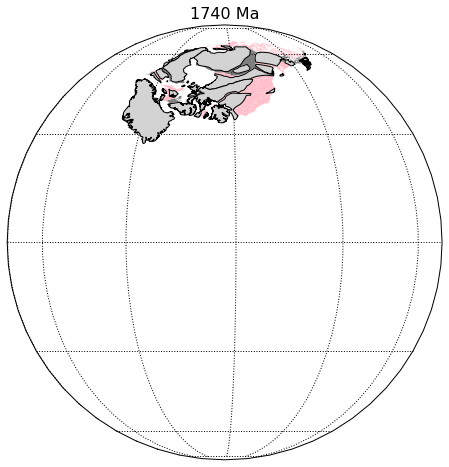

In [8]:
ax = make_orthographic_map(central_longitude=117)

shpfilename = '../Reconstructions/Proterozoic_Laurentia_simple/1740Ma_Laurentia.shp'

reader = shpreader.Reader(shpfilename)
units = reader.records()

for unit in units:

    if unit.attributes['Unit'] == 'Basin' or \
       unit.attributes['Unit'] == '2.5 - 2.0 Ga miogeoclinal sediments':
            ax.add_geometries(unit.geometry, ccrs.PlateCarree(),
                  facecolor='lightyellow',
                  label=unit.attributes['Unit'])

    elif unit.attributes['Unit'] == '1.9 - 1.8 Ga reworked Archean crust':
        ax.add_geometries(unit.geometry, ccrs.PlateCarree(),
                  facecolor='grey',
                  label=unit.attributes['Unit'])
    elif unit.attributes['Unit'] == '2.0 - 1.8 Ga juvenile orogens' or \
         unit.attributes['Unit'] == '2.0 - 1.8 Ga juvenile arcs' or \
         unit.attributes['Unit'] == '1.80 - 1.76 Ga juvenile arcs' or \
         unit.attributes['Unit'] == '1.76 - 1.72 Ga juvenile crust' or \
         unit.attributes['Unit'] == '1.72 - 1.68 Ga granitoids' or \
         unit.attributes['Unit'] == '1.69 - 1.65 Ga juvenile crust' or \
         unit.attributes['Unit'] == '1.65 - 1.60 Ga granitoids' or \
         unit.attributes['Unit'] == 'approx 1.70 Ga quartzite deposits' or \
         unit.attributes['Unit'] == 'approx. 1.65 Ga quartzite deposits':
        ax.add_geometries(unit.geometry, ccrs.PlateCarree(),
                           facecolor='pink',
                           label=unit.attributes['Unit'])
    elif unit.attributes['Unit'] == '1.55 - 1.35 Ga juvenile crust' or \
         unit.attributes['Unit'] == '1.45 - 1.35 Ga granitoids' or \
         unit.attributes['Unit'] == '1.3 - 1.0 Ga collisional orogens' or \
         unit.attributes['Unit'] == '1.3 - 0.95 Ga granitoids' or \
         unit.attributes['Unit'] == '1.2 - 1.1 Ga Midcontinent rift system':
        ax.add_geometries(unit.geometry, ccrs.PlateCarree(),
                           facecolor='LightSalmon',
                           label=unit.attributes['Unit'])
        
    elif unit.attributes['Unit'] == '> 2.5 Ga Archean crust':
        ax.add_geometries(unit.geometry, ccrs.PlateCarree(),
                      facecolor='lightgrey',edgecolor='black',
                      label=unit.attributes['Unit'],zorder=80)

plt.title('1740 Ma',fontsize=16)
plt.savefig('../Figures/Laurentia_1740.svg')
plt.show()

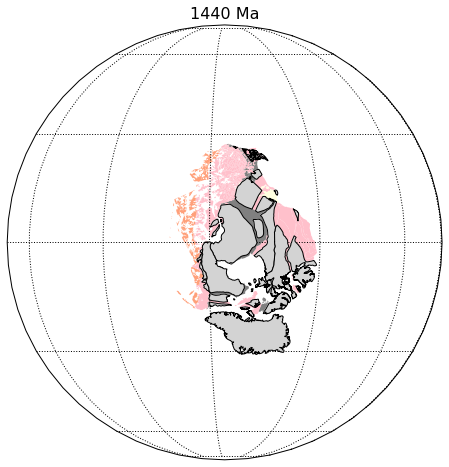

In [9]:
ax = make_orthographic_map(central_longitude=94)

shpfilename = '../Reconstructions/Proterozoic_Laurentia_simple/1440Ma_Laurentia.shp'

reader = shpreader.Reader(shpfilename)
units = reader.records()

for unit in units:

    if unit.attributes['Unit'] == 'Basin' or \
       unit.attributes['Unit'] == '2.5 - 2.0 Ga miogeoclinal sediments':
            ax.add_geometries(unit.geometry, ccrs.PlateCarree(),
                  facecolor='lightyellow',
                  label=unit.attributes['Unit'])

    elif unit.attributes['Unit'] == '1.9 - 1.8 Ga reworked Archean crust':
        ax.add_geometries(unit.geometry, ccrs.PlateCarree(),
                  facecolor='grey',
                  label=unit.attributes['Unit'])
    elif unit.attributes['Unit'] == '2.0 - 1.8 Ga juvenile orogens' or \
         unit.attributes['Unit'] == '2.0 - 1.8 Ga juvenile arcs' or \
         unit.attributes['Unit'] == '1.80 - 1.76 Ga juvenile arcs' or \
         unit.attributes['Unit'] == '1.76 - 1.72 Ga juvenile crust' or \
         unit.attributes['Unit'] == '1.72 - 1.68 Ga granitoids' or \
         unit.attributes['Unit'] == '1.69 - 1.65 Ga juvenile crust' or \
         unit.attributes['Unit'] == '1.65 - 1.60 Ga granitoids' or \
         unit.attributes['Unit'] == 'approx 1.70 Ga quartzite deposits' or \
         unit.attributes['Unit'] == 'approx. 1.65 Ga quartzite deposits':
        ax.add_geometries(unit.geometry, ccrs.PlateCarree(),
                           facecolor='pink',
                           label=unit.attributes['Unit'])
    elif unit.attributes['Unit'] == '1.55 - 1.35 Ga juvenile crust' or \
         unit.attributes['Unit'] == '1.45 - 1.35 Ga granitoids' or \
         unit.attributes['Unit'] == '1.3 - 1.0 Ga collisional orogens' or \
         unit.attributes['Unit'] == '1.3 - 0.95 Ga granitoids' or \
         unit.attributes['Unit'] == '1.2 - 1.1 Ga Midcontinent rift system':
        ax.add_geometries(unit.geometry, ccrs.PlateCarree(),
                           facecolor='LightSalmon',
                           label=unit.attributes['Unit'])
        
    elif unit.attributes['Unit'] == '> 2.5 Ga Archean crust':
        ax.add_geometries(unit.geometry, ccrs.PlateCarree(),
                      facecolor='lightgrey',edgecolor='black',
                      label=unit.attributes['Unit'],zorder=80)

plt.title('1440 Ma',fontsize=16)
plt.savefig('../Figures/Laurentia_1440.svg')
plt.show()

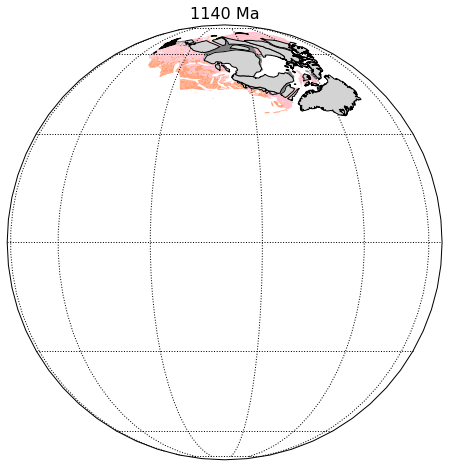

In [10]:
ax = make_orthographic_map(central_longitude=110)

shpfilename = '../Reconstructions/Proterozoic_Laurentia_simple/1140Ma_Laurentia.shp'

reader = shpreader.Reader(shpfilename)
units = reader.records()

for unit in units:

    if unit.attributes['Unit'] == 'Basin' or \
       unit.attributes['Unit'] == '2.5 - 2.0 Ga miogeoclinal sediments':
            ax.add_geometries(unit.geometry, ccrs.PlateCarree(),
                  facecolor='lightyellow',
                  label=unit.attributes['Unit'])

    elif unit.attributes['Unit'] == '1.9 - 1.8 Ga reworked Archean crust':
        ax.add_geometries(unit.geometry, ccrs.PlateCarree(),
                  facecolor='grey',
                  label=unit.attributes['Unit'])
    elif unit.attributes['Unit'] == '2.0 - 1.8 Ga juvenile orogens' or \
         unit.attributes['Unit'] == '2.0 - 1.8 Ga juvenile arcs' or \
         unit.attributes['Unit'] == '1.80 - 1.76 Ga juvenile arcs' or \
         unit.attributes['Unit'] == '1.76 - 1.72 Ga juvenile crust' or \
         unit.attributes['Unit'] == '1.72 - 1.68 Ga granitoids' or \
         unit.attributes['Unit'] == '1.69 - 1.65 Ga juvenile crust' or \
         unit.attributes['Unit'] == '1.65 - 1.60 Ga granitoids' or \
         unit.attributes['Unit'] == 'approx 1.70 Ga quartzite deposits' or \
         unit.attributes['Unit'] == 'approx. 1.65 Ga quartzite deposits':
        ax.add_geometries(unit.geometry, ccrs.PlateCarree(),
                           facecolor='pink',
                           label=unit.attributes['Unit'])
    elif unit.attributes['Unit'] == '1.55 - 1.35 Ga juvenile crust' or \
         unit.attributes['Unit'] == '1.45 - 1.35 Ga granitoids' or \
         unit.attributes['Unit'] == '1.3 - 1.0 Ga collisional orogens' or \
         unit.attributes['Unit'] == '1.3 - 0.95 Ga granitoids' or \
         unit.attributes['Unit'] == '1.2 - 1.1 Ga Midcontinent rift system':
        ax.add_geometries(unit.geometry, ccrs.PlateCarree(),
                           facecolor='LightSalmon',
                           label=unit.attributes['Unit'])
        
    elif unit.attributes['Unit'] == '> 2.5 Ga Archean crust':
        ax.add_geometries(unit.geometry, ccrs.PlateCarree(),
                      facecolor='lightgrey',edgecolor='black',
                      label=unit.attributes['Unit'],zorder=80)

plt.title('1140 Ma',fontsize=16)
plt.savefig('../Figures/Laurentia_1140.svg')
plt.show()

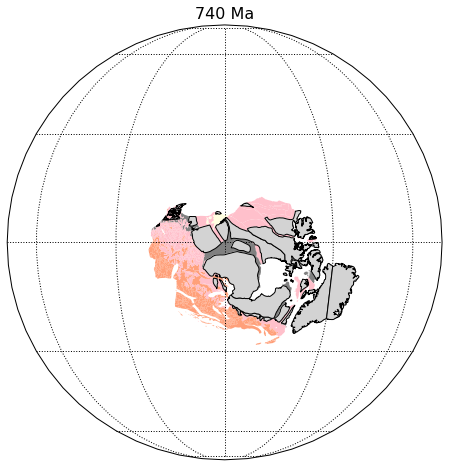

In [11]:
ax = make_orthographic_map(central_longitude=150)

shpfilename = '../Reconstructions/Proterozoic_Laurentia_simple/740Ma_Laurentia.shp'

reader = shpreader.Reader(shpfilename)
units = reader.records()

for unit in units:

    if unit.attributes['Unit'] == 'Basin' or \
       unit.attributes['Unit'] == '2.5 - 2.0 Ga miogeoclinal sediments':
            ax.add_geometries(unit.geometry, ccrs.PlateCarree(),
                  facecolor='lightyellow',
                  label=unit.attributes['Unit'])

    elif unit.attributes['Unit'] == '1.9 - 1.8 Ga reworked Archean crust':
        ax.add_geometries(unit.geometry, ccrs.PlateCarree(),
                  facecolor='grey',
                  label=unit.attributes['Unit'])
    elif unit.attributes['Unit'] == '2.0 - 1.8 Ga juvenile orogens' or \
         unit.attributes['Unit'] == '2.0 - 1.8 Ga juvenile arcs' or \
         unit.attributes['Unit'] == '1.80 - 1.76 Ga juvenile arcs' or \
         unit.attributes['Unit'] == '1.76 - 1.72 Ga juvenile crust' or \
         unit.attributes['Unit'] == '1.72 - 1.68 Ga granitoids' or \
         unit.attributes['Unit'] == '1.69 - 1.65 Ga juvenile crust' or \
         unit.attributes['Unit'] == '1.65 - 1.60 Ga granitoids' or \
         unit.attributes['Unit'] == 'approx 1.70 Ga quartzite deposits' or \
         unit.attributes['Unit'] == 'approx. 1.65 Ga quartzite deposits':
        ax.add_geometries(unit.geometry, ccrs.PlateCarree(),
                           facecolor='pink',
                           label=unit.attributes['Unit'])
    elif unit.attributes['Unit'] == '1.55 - 1.35 Ga juvenile crust' or \
         unit.attributes['Unit'] == '1.45 - 1.35 Ga granitoids' or \
         unit.attributes['Unit'] == '1.3 - 1.0 Ga collisional orogens' or \
         unit.attributes['Unit'] == '1.3 - 0.95 Ga granitoids' or \
         unit.attributes['Unit'] == '1.2 - 1.1 Ga Midcontinent rift system':
        ax.add_geometries(unit.geometry, ccrs.PlateCarree(),
                           facecolor='LightSalmon',
                           label=unit.attributes['Unit'])
        
    elif unit.attributes['Unit'] == '> 2.5 Ga Archean crust':
        ax.add_geometries(unit.geometry, ccrs.PlateCarree(),
                      facecolor='lightgrey',edgecolor='black',
                      label=unit.attributes['Unit'],zorder=80)

plt.title('740 Ma',fontsize=16)
plt.savefig('../Figures/Laurentia_740.svg')
plt.show()